###  Naive Bayes Classification for salary data 

Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	relationship of individuals
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual


### Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn import metrics

### The Data

In [94]:
train = pd.read_csv('SalaryData_Train.csv')
train.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [95]:
train.shape

(30161, 14)

In [96]:
test = pd.read_csv('SalaryData_Test.csv')
test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [97]:
test.shape

(15060, 14)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [99]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='Salary', ylabel='count'>

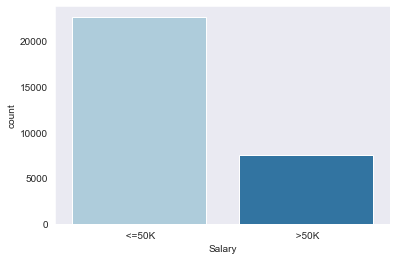

In [100]:
# Salary
sns.countplot(x = train.Salary, palette='Paired')

<AxesSubplot:xlabel='Salary', ylabel='count'>

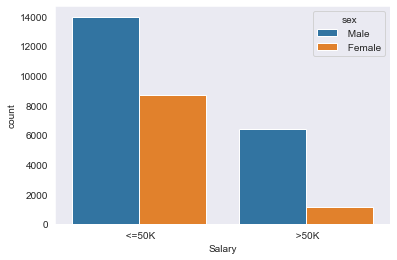

In [101]:
# Salary Gender 
sns.countplot(x = 'Salary', hue='sex', data=train)

<AxesSubplot:xlabel='relationship', ylabel='count'>

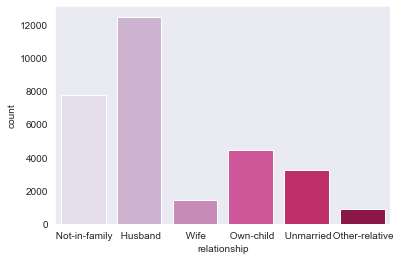

In [102]:
# Relationship
sns.countplot(x = train.relationship, palette='PuRd')

In [103]:
# Marital Status
train['maritalstatus'].value_counts() #7 categories

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [104]:
# Native
train['native'].nunique() # 40 categories

40

<AxesSubplot:xlabel='count', ylabel='race'>

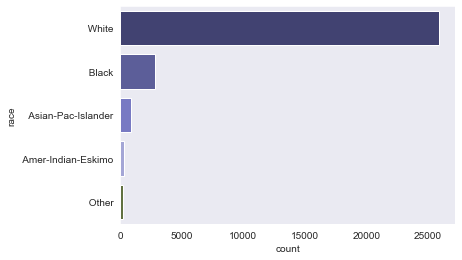

In [105]:
# Race
sns.countplot(y = train.race, palette='tab20b')

<AxesSubplot:xlabel='count', ylabel='sex'>

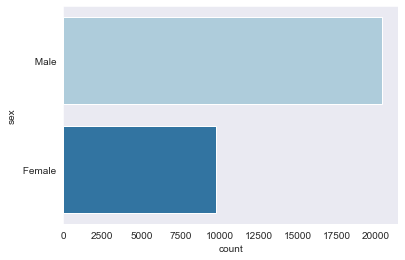

In [106]:
# Sex
sns.countplot(y = train.sex, palette='Paired')

<AxesSubplot:xlabel='count', ylabel='occupation'>

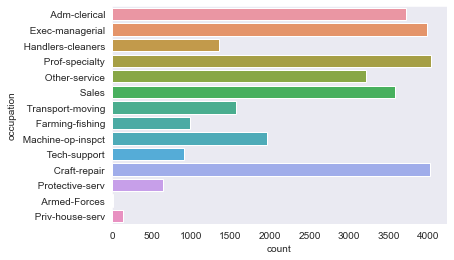

In [107]:
# Occupation
sns.countplot(y = train.occupation) # 14 categories

<AxesSubplot:xlabel='age', ylabel='Count'>

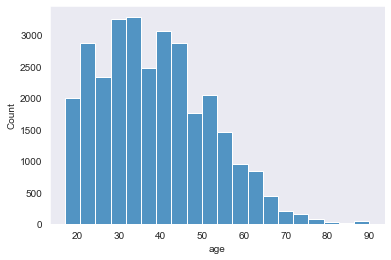

In [108]:
sns.histplot(train.age,bins=20)

<AxesSubplot:xlabel='count', ylabel='education'>

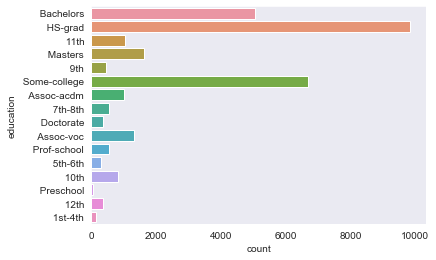

In [109]:
# Education
sns.countplot(y=train['education']) # 16 categories

<AxesSubplot:xlabel='workclass', ylabel='age'>

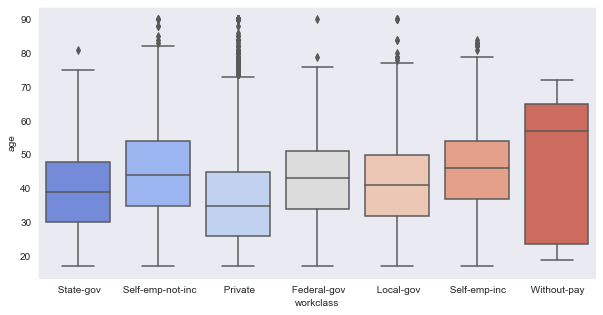

In [110]:
sns.set_style('dark')
plt.figure(figsize=(10,5))
sns.boxplot(x =train['workclass'], y=train['age'], palette='coolwarm')

<AxesSubplot:>

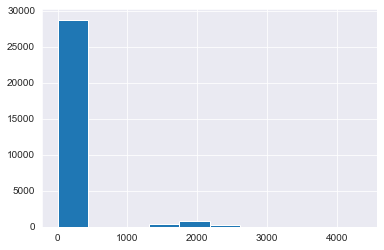

In [111]:
# capital loss
train['capitalloss'].hist()

<AxesSubplot:>

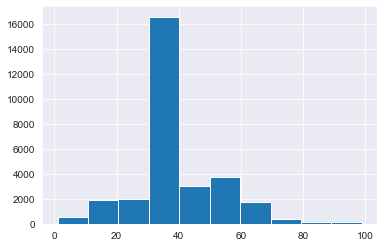

In [112]:
# hours per week
train['hoursperweek'].hist()

In [113]:
train = train.drop('education', axis=1) 
test = test.drop('education', axis=1) 


labelencoder = LabelEncoder()
binaryencoder = LabelBinarizer()

cols = ['maritalstatus','workclass','occupation','relationship','native','race']

for i in cols:
    train[i] = labelencoder.fit_transform(train[i])
    test[i] = labelencoder.fit_transform(test[i])

train.loc[:,'sex'] = binaryencoder.fit_transform(train.loc[:,'sex'])
train.loc[:,'Salary'] = binaryencoder.fit_transform(train.loc[:,'Salary'])

test.loc[:,'sex'] = binaryencoder.fit_transform(test.loc[:,'sex'])
test.loc[:,'Salary'] = binaryencoder.fit_transform(test.loc[:,'Salary'])

In [114]:
train.head(2)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0


In [115]:
test.head(2)

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0


In [116]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

### Model Building

In [117]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [118]:
gnb.score(X_train, y_train)

0.7934418620072279

In [119]:
test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7,4,6,3,2,1,0,0,40,37,0
1,38,2,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,2,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,6,4,7,1,4,1,0,0,30,37,0


In [120]:
predicted = gnb.predict(test.iloc[:,:-1])

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
confusion_matrix(test.iloc[:,-1], predicted)

array([[10772,   588],
       [ 2521,  1179]], dtype=int64)

In [123]:
print(classification_report(test.iloc[:,-1], predicted))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.32      0.43      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.78      0.79      0.77     15060



### Feature importance 

Feature: 0, Score: 0.21691
Feature: 1, Score: 0.04227
Feature: 2, Score: 0.13625
Feature: 3, Score: 0.12082
Feature: 4, Score: 0.07958
Feature: 5, Score: 0.13749
Feature: 6, Score: 0.01700
Feature: 7, Score: 0.01320
Feature: 8, Score: 0.08601
Feature: 9, Score: 0.02860
Feature: 10, Score: 0.10438
Feature: 11, Score: 0.01748


<BarContainer object of 12 artists>

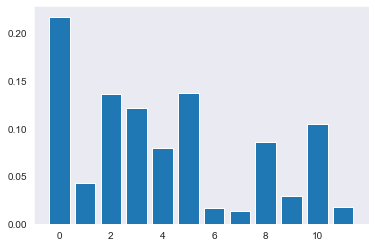

In [125]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

class_weights = {0:1,1:3}
model = RandomForestClassifier(criterion='gini', class_weight=class_weights)

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)

In [126]:
model.score(X_train, y_train)  #randomforest score

0.9724147077351547

In [127]:
train.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [191]:
X_train1 = train.loc[:,['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']]
y_train1 = train.iloc[:,-1]

gnb1 = BernoulliNB()
gnb1.fit(X_train1, y_train1)

BernoulliNB()

In [192]:
 gnb1.score(X_train1, y_train1)

0.7899273896754087

In [193]:
predicted1 = gnb1.predict(test.loc[:,['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']])

In [194]:
confusion_matrix(test.iloc[:,-1],predicted1)

array([[11023,   337],
       [ 2795,   905]], dtype=int64)

In [195]:
print(classification_report(test.iloc[:,-1], predicted1))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.24      0.37      3700

    accuracy                           0.79     15060
   macro avg       0.76      0.61      0.62     15060
weighted avg       0.78      0.79      0.75     15060



In [196]:
test.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [197]:
train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

### Over sampling

In [242]:
import imblearn

In [252]:
train_0 = train[train['Salary'] == 0]
train_1 = train[train['Salary'] == 1]

In [253]:
train_1_over = train_1.sample(22653, replace=True)

In [254]:
final_train = pd.concat([train_0,train_1_over],axis=0)

In [255]:
final_train

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,13,2,3,0,4,1,0,0,13,37,0
2,38,2,9,0,5,1,4,1,0,0,40,37,0
3,53,2,7,2,5,0,2,1,0,0,40,37,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12271,41,2,9,2,9,0,4,1,0,1902,40,37,1
20343,55,2,10,2,3,0,4,1,0,0,60,37,1
17806,45,2,13,0,3,1,4,1,0,0,40,37,1
29585,49,4,13,2,9,0,4,1,0,0,60,37,1


In [256]:
gnb2 = GaussianNB()
gnb2.fit(final_train.iloc[:,:-1], final_train['Salary'])

GaussianNB()

In [257]:
 gnb2.score(X_train, y_train)

0.8019296442425649

In [258]:
a = gnb2.predict(test.iloc[:,:-1])

In [259]:
confusion_matrix(test['Salary'],a)

array([[10629,   731],
       [ 2227,  1473]], dtype=int64)

In [260]:
print(classification_report(test['Salary'],a))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11360
           1       0.67      0.40      0.50      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.67      0.69     15060
weighted avg       0.79      0.80      0.78     15060



### SMOTE Over Sampling

In [228]:
from imblearn.over_sampling import SMOTE

In [233]:
x = train.drop('Salary',axis=1)
y = train.Salary

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [236]:
gnb3 = GaussianNB()
gnb3.fit(x_sm, y_sm)

GaussianNB()

In [239]:
pre = gnb3.predict(test.iloc[:,:-1])

In [240]:
print(classification_report(test['Salary'],pre))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     11360
           1       0.68      0.41      0.51      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.67      0.70     15060
weighted avg       0.79      0.81      0.79     15060

